In [1]:
import sys
import os
import subprocess
from six import string_types
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy
from skimage import io
from scipy import ndimage
from IPython.display import display
%matplotlib inline

!pip install --upgrade pip chart_studio
import chart_studio.plotly as py
import plotly.tools as tls
from plotly.offline import iplot
import cv2
from sklearn.feature_extraction.text import CountVectorizer
from operator import itemgetter

     |████████████████████████████████| 1.5 MB 195 kB/s eta 0:00:01
     |████████████████████████████████| 64 kB 2.0 MB/s eta 0:00:011
  Attempting uninstall: pip
    Found existing installation: pip 20.2.2
    Uninstalling pip-20.2.2:
      Successfully uninstalled pip-20.2.2


In [2]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from os import listdir
from numpy import zeros
from numpy import asarray
from numpy import savez_compressed

In [3]:
import gc
pal = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

print('# File sizes')
for f in os.listdir('../input/planets-dataset/planet/planet'):
    if not os.path.isdir('../input/planets-dataset/planet/planet/' + f):
        print(f.ljust(30) + str(round(os.path.getsize('../input/planets-dataset/planet/planet/' + f) / 1000000, 2)) + 'MB')
    else:
        sizes = [os.path.getsize('../input/planets-dataset/planet/planet/'+f+'/'+x)/1000000 for x in os.listdir('../input/planets-dataset/planet/planet/' + f)]
        print(f.ljust(30) + str(round(sum(sizes), 2)) + 'MB' + ' ({} files)'.format(len(sizes)))

# File sizes
test-jpg                      637.8MB (40669 files)
sample_submission.csv         2.91MB
train_classes.csv             1.43MB
train-jpg                     634.68MB (40479 files)


In [4]:
PLANET_KAGGLE_ROOT = os.path.abspath("../input/")
PLANET_KAGGLE_JPEG_DIR = os.path.join(PLANET_KAGGLE_ROOT, '../input/planets-dataset/planet/planet/train-jpg/')
PLANET_KAGGLE_LABEL_CSV = os.path.join(PLANET_KAGGLE_ROOT, '../input/planets-dataset/planet/planet/train_classes.csv')
assert os.path.exists(PLANET_KAGGLE_ROOT)
assert os.path.exists(PLANET_KAGGLE_JPEG_DIR)
assert os.path.exists(PLANET_KAGGLE_LABEL_CSV)

In [5]:
train_df = pd.read_csv(PLANET_KAGGLE_LABEL_CSV)
train_df.head()


train_classes = train_df.copy()


In [6]:
labels = set()
for i in range(len(train_classes)):
    tags = train_classes['tags'][i].split(' ')
    labels.update(tags)
    
    
label_list = list(labels)
label_list


['conventional_mine',
 'habitation',
 'cloudy',
 'cultivation',
 'blow_down',
 'slash_burn',
 'partly_cloudy',
 'primary',
 'bare_ground',
 'artisinal_mine',
 'selective_logging',
 'blooming',
 'water',
 'agriculture',
 'road',
 'haze',
 'clear']

In [7]:
# Add onehot features for every label
for label in label_list:
    train_classes[label] = train_classes['tags'].apply(lambda x: 1 if label in x.split(' ') else 0)
    
    
# adding '.jpg' extension to 'image_name'
def append_ext(fn):
    return fn+".jpg"

train_classes["image_name"]=train_classes["image_name"].apply(append_ext)

train_classes.head()


,image_name,tags,conventional_mine,habitation,cloudy,cultivation,blow_down,slash_burn,partly_cloudy,primary,bare_ground,artisinal_mine,selective_logging,blooming,water,agriculture,road,haze,clear
0,train_0.jpg,haze primary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,train_1.jpg,agriculture clear primary water,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1
2,train_2.jpg,clear primary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,train_3.jpg,clear primary,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,train_4.jpg,agriculture clear habitation primary road,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1


In [8]:
y_col = list(train_classes.columns[2:])

In [9]:
y_col

['conventional_mine',
 'habitation',
 'cloudy',
 'cultivation',
 'blow_down',
 'slash_burn',
 'partly_cloudy',
 'primary',
 'bare_ground',
 'artisinal_mine',
 'selective_logging',
 'blooming',
 'water',
 'agriculture',
 'road',
 'haze',
 'clear']

In [10]:
assert len(train_classes['image_name'].unique()) == train_classes.shape[0]

In [11]:
from numpy import load
from numpy import ones
from numpy import asarray
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
import sys
from keras import backend
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras import backend
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Dropout

In [12]:
# initializing an image generator with some data augumentation
image_gen =ImageDataGenerator(rescale=1./255.)

# loading images from dataframe
X = image_gen.flow_from_dataframe(dataframe=train_classes,
        directory='/kaggle/input/planets-dataset/planet/planet/train-jpg/', x_col='image_name', y_col=y_col,
       target_size=(128, 128), class_mode='raw', seed=1, batch_size=128)

Found 40479 validated image filenames.


In [13]:
image_num1 =1
image_num2 =10
image_num3 =100

img1 = io.imread('../input/planets-dataset/planet/planet/train-jpg/train_{}.jpg'.format(image_num1))
img2 = io.imread('../input/planets-dataset/planet/planet/train-jpg/train_{}.jpg'.format(image_num2))
img3 = io.imread('../input/planets-dataset/planet/planet/train-jpg/train_{}.jpg'.format(image_num3))

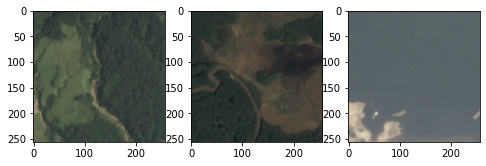

In [14]:
plt.figure(figsize=(8, 5))

plt.subplot(1,3,1)
plt.imshow(img1)

plt.subplot(1,3,2)
plt.imshow(img2)

plt.subplot(1,3,3)
plt.imshow(img3)

plt.show()

In [15]:
def fbeta(y_true , y_pred, beta=2, epsilon=1e-4):
    squared_beta = beta**2

    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(tf.greater(tf.cast(y_pred, tf.float32), tf.constant(0.2)), tf.float32)
        
    tp = tf.reduce_sum(y_true * y_pred, axis=1)
    fp = tf.reduce_sum(y_pred, axis=1) - tp
    fn = tf.reduce_sum(y_true, axis=1) - tp
    
    p = tp/(tp+fp+epsilon)   #precision
    r = tp/(tp+fn+epsilon)   #recall
    
    fb = (1+squared_beta)*p*r / (squared_beta*p + r + epsilon)
    return fb

In [16]:
train_image_generator =ImageDataGenerator(rescale=1/255,validation_split=0.2,
                                          rotation_range = 180, horizontal_flip = True)

# using a validation split here

# generating the 80% training image data
train_generator = train_image_generator.flow_from_dataframe(dataframe=train_classes,
        directory='../input/planets-dataset/planet/planet/train-jpg/', x_col='image_name', y_col=y_col,
       target_size=(128, 128), class_mode='raw', seed=0, batch_size=128, subset='training')

# generating the 20% validation image data
validation_generator = train_image_generator.flow_from_dataframe(dataframe=train_classes,
        directory='../input/planets-dataset/planet/planet/train-jpg/', x_col='image_name', y_col=y_col,
       target_size=(128, 128), class_mode='raw', seed=0, batch_size=128, subset='validation')

Found 32384 validated image filenames.
Found 8095 validated image filenames.


In [17]:
# setting step size for training and validation image data
train_step_size = int(np.ceil(train_generator.samples / train_generator.batch_size))
val_step_size = int(np.ceil(validation_generator.samples / train_generator.batch_size))


In [18]:
from tensorflow import keras

# Using Resnet50 model

in_shape=(128, 128, 3)
out_shape=17


resnet50 = keras.applications.resnet50
conv_model = resnet50.ResNet50(weights='imagenet', include_top=False, input_shape=in_shape)

    
    
# add new classifier layers
class0 = Flatten()(conv_model.layers[-1].output)
class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(class0)
class2 =Dense(128, activation='relu', kernel_initializer='he_uniform')(class1)
predictions = Dense(out_shape, activation='sigmoid')(class2)

full_model = keras.models.Model(inputs=conv_model.input, outputs=predictions)
full_model.summary()

94773248/94765736 [==============================] - 1s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
______________________

In [19]:
# compile model
opt =keras.optimizers.Adam(lr=0.0001)
full_model.compile(optimizer=opt, loss='binary_crossentropy', metrics=[fbeta])


In [20]:

from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='weight_model.hdf5',monitor='val_fbeta', 
                             save_best_only=True, save_weights_only=True, mode='max', verbose = 1)
early = EarlyStopping(monitor='val_fbeta', min_delta=0, patience=10, verbose=1, mode='max')


In [21]:
# fit model
history = full_model.fit(train_generator, steps_per_epoch=train_step_size, 
                                  validation_data=validation_generator, validation_steps=val_step_size, 
                                   epochs=20,callbacks=[checkpoint,early])

Epoch 1/20
253/253 [==============================] - ETA: 0s - loss: 0.1411 - fbeta: 0.8742
Epoch 00001: val_fbeta improved from -inf to 0.34254, saving model to weight_model.hdf5
253/253 [==============================] - 293s 1s/step - loss: 0.1411 - fbeta: 0.8742 - val_loss: 0.5547 - val_fbeta: 0.3425
Epoch 2/20
253/253 [==============================] - ETA: 0s - loss: 0.1065 - fbeta: 0.9061
Epoch 00002: val_fbeta did not improve from 0.34254
253/253 [==============================] - 257s 1s/step - loss: 0.1065 - fbeta: 0.9061 - val_loss: 0.6010 - val_fbeta: 0.1072
Epoch 3/20
253/253 [==============================] - ETA: 0s - loss: 0.0986 - fbeta: 0.9132
Epoch 00003: val_fbeta improved from 0.34254 to 0.62928, saving model to weight_model.hdf5
253/253 [==============================] - 255s 1s/step - loss: 0.0986 - fbeta: 0.9132 - val_loss: 0.3686 - val_fbeta: 0.6293
Epoch 4/20
253/253 [==============================] - ETA: 0s - loss: 0.0942 - fbeta: 0.9179
Epoch 00004: val_fb

In [22]:
history.history

{'loss': [0.14113162457942963,
  0.10651211440563202,
  0.09858064353466034,
  0.09418942034244537,
  0.09191589057445526,
  0.0895446240901947,
  0.08712433278560638,
  0.08535964041948318,
  0.08302346616983414,
  0.0814444050192833,
  0.07955949753522873,
  0.07765363156795502,
  0.07580792903900146,
  0.07419800013303757,
  0.07197907567024231,
  0.0703025758266449,
  0.06835363060235977,
  0.06634941697120667,
  0.0646565854549408],
 'fbeta': [0.87416011095047,
  0.9060651063919067,
  0.9132023453712463,
  0.9178733229637146,
  0.9198794364929199,
  0.921185314655304,
  0.9239388704299927,
  0.9250771999359131,
  0.9272230267524719,
  0.928705096244812,
  0.9297023415565491,
  0.931734025478363,
  0.9330886602401733,
  0.9345123171806335,
  0.9362867474555969,
  0.9382086396217346,
  0.9391777515411377,
  0.9408538341522217,
  0.9425739049911499],
 'val_loss': [0.5546779632568359,
  0.600951075553894,
  0.3686249256134033,
  0.2641109228134155,
  0.1127384677529335,
  0.1001485884

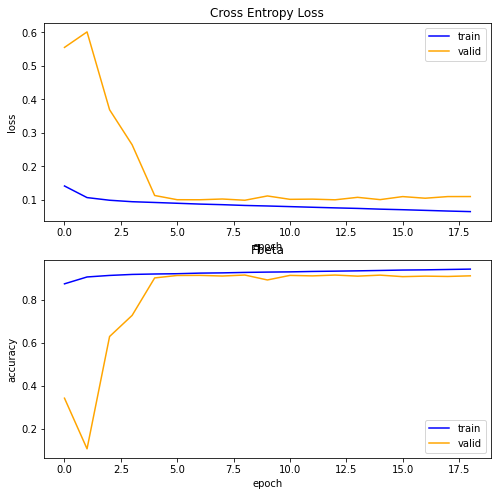

In [23]:
plt.figure(1, figsize = (8,8)) 
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

# plot accuracy
plt.subplot(212)
plt.title('Fbeta')
plt.plot(history.history['fbeta'], color='blue', label='train')
plt.plot(history.history['val_fbeta'], color='orange', label='test')
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

In [24]:
model2 = full_model # building a sequential model for testing

#loading in the weights of the trained model
model2.load_weights('weight_model.hdf5')

In [25]:
sample_submission_df = pd.read_csv('../input/planets-dataset/planet/planet/sample_submission.csv')
sample_submission_df.head()

# adding .jpg extension to 'image_name' in sample_submission data
sample_sub = sample_submission_df.copy()
sample_sub['image_name'] = sample_sub['image_name'].apply(lambda i: '{}.jpg'.format(i))
sample_sub.head()

,image_name,tags
0,test_0.jpg,primary clear agriculture road water
1,test_1.jpg,primary clear agriculture road water
2,test_2.jpg,primary clear agriculture road water
3,test_3.jpg,primary clear agriculture road water
4,test_4.jpg,primary clear agriculture road water


In [26]:
# selecting the first 40669 image_name from the sample_submission to generate image data for test.jpg
test1 = sample_sub.iloc[:40669]['image_name'].reset_index().drop('index', axis=1)
test1.head()

,image_name
0,test_0.jpg
1,test_1.jpg
2,test_2.jpg
3,test_3.jpg
4,test_4.jpg


In [27]:
# to check the shape of the first test
test1.shape

(40669, 1)

In [28]:
# initializing an image data generator object for the test1
test_image_generator1 = ImageDataGenerator(rescale=1/255)


test_generator1 = test_image_generator1.flow_from_dataframe(dataframe=test1,
            directory='../input/planets-dataset/planet/planet/test-jpg', x_col='image_name', y_col=None,
            batch_size=128, shuffle=False, class_mode=None, target_size=(128, 128))

# setting the step size 
test_step_size1 = int(np.ceil(test_generator1.samples / test_generator1.batch_size))

Found 40669 validated image filenames.


In [29]:
# reseting the generator to avoid shuffling

test_generator1.reset() 

# prediction for test1
prediction1 = model2.predict(test_generator1, steps=test_step_size1, verbose=1) 

318/318 [==============================] - 169s 532ms/step


In [30]:
# obtaining the filenames from test_generator
filenames1 = test_generator1.filenames 
        
# converting the predictions of the first 40669 to tag names
predict_tags1 = pd.DataFrame(prediction1)
predict_tags1 = predict_tags1.apply(lambda x: ' '.join(np.array(label_list)[x > 0.2]), axis=1)

# converting the predictions of the first 40669 to a dataframe
result_df1 = pd.DataFrame({'image_name': filenames1, 'tags': predict_tags1})
result_df1.head()

,image_name,tags
0,test_0.jpg,primary clear
1,test_1.jpg,primary clear
2,test_2.jpg,partly_cloudy primary
3,test_3.jpg,primary agriculture clear
4,test_4.jpg,cloudy partly_cloudy primary


In [31]:
# selecting the remaining image_name from the sample_submission to generate image data for test-additional.jpg
test2 = sample_sub.iloc[40669:]['image_name'].reset_index().drop('index', axis=1)
test2.head()

,image_name
0,file_0.jpg
1,file_1.jpg
2,file_10.jpg
3,file_100.jpg
4,file_1000.jpg


In [34]:
# initializing an image data generator object for the remaining images in the sample submission dataframe
test_image_generator2 = ImageDataGenerator(rescale=1/255)


test_generator2 = test_image_generator2.flow_from_dataframe(dataframe=test2, 
            directory='../input/planets-dataset/test-jpg-additional/test-jpg-additional', x_col='image_name', 
            y_col=None, batch_size=128, shuffle=False, class_mode=None, target_size=(128, 128))

# setting the step size for test2
test_step_size2 = int(np.ceil(test_generator2.samples / test_generator2.batch_size))

Found 20522 validated image filenames.


In [35]:
# reseting the generator to avoid shuffling
test_generator2.reset() 

# prediction for test2
prediction2 = model2.predict(test_generator2, steps=test_step_size2, verbose=1)

161/161 [==============================] - 84s 522ms/step


In [36]:
# obtaining the filenames from test_generator2
filenames2 = test_generator2.filenames 
        
# converting the predictions of the remaining images to tag names
predict_tags2 = pd.DataFrame(prediction2)
predict_tags2 = predict_tags2.apply(lambda x: ' '.join(np.array(label_list)[x > 0.2]), axis=1)

# converting the predictions of the remaining to a dataframe
result_df2 = pd.DataFrame({'image_name': filenames2, 'tags': predict_tags2})

In [37]:
# concatenating the predictions of test.jpg and test-additional.jpg into a single dataframe
final_result = pd.concat([result_df1, result_df2]) 
    
final_result = final_result.reset_index().drop('index', axis=1)

print(final_result.shape)
final_result.head()

(61191, 2)


,image_name,tags
0,test_0.jpg,primary clear
1,test_1.jpg,primary clear
2,test_2.jpg,partly_cloudy primary
3,test_3.jpg,primary agriculture clear
4,test_4.jpg,cloudy partly_cloudy primary


In [38]:
# confirming that the predicted images are ordered as in sample submission dataframe
assert sum(sample_sub['image_name'] == final_result['image_name']) == 61191

In [39]:
# removing the .jpg extension from 'iamge_name' column
final_result['image_name'] = final_result['image_name'].apply(lambda x: x[:-4])
final_result.head()

,image_name,tags
0,test_0,primary clear
1,test_1,primary clear
2,test_2,partly_cloudy primary
3,test_3,primary agriculture clear
4,test_4,cloudy partly_cloudy primary


In [40]:
final_result.to_csv('best_submission.csv', index=False) # saving the predictions

In [ ]:
# remember to remove index